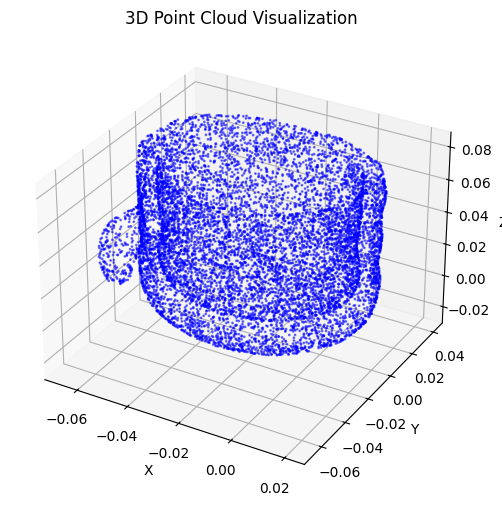

In [19]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

# STL/PLY/OBJ 파일 경로
file_path = "./mesh_files/mug/textured.obj"


# 예시 SE(3) 변환 행렬 (회전 + 이동)
# 예시로 (회전 + 이동)을 적용한 변환 행렬을 정의
# 회전 행렬 (임의 값)
rotation_matrix = np.array([[1.0, 0, 0.0],
                            [0, 1.0, 0.0],
                            [0.0, 0.0, 1.0]])

# 평행이동 벡터 (임의 값)
translation_vector = np.array([0.0, 0.0, 0.0])

# SE(3) 변환 행렬 정의 (3x4)
pose = np.eye(4)
pose[:3, :3] = rotation_matrix
pose[:3, 3] = translation_vector

# 모델 로드 및 포즈 적용
mesh = o3d.io.read_triangle_mesh(file_path)
mesh = mesh.transform(pose)

# Point Cloud로 변환
point_cloud = mesh.sample_points_uniformly(number_of_points=10000)
points_np = np.asarray(point_cloud.points)

plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(points_np[:, 0], points_np[:, 1], points_np[:, 2], s=1, c='b', alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Point Cloud Visualization')
plt.show()

